In [35]:
import numpy as np
import os
%matplotlib inline  
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm


In [36]:
dataDir = "C:\\Users\\ADMIN\Documents\\AI\SVM\\rice-corn-classification-using-svm\\data"
classes = ['BC15', 'BQ10', 'NH92']


In [37]:
os.walk(dataDir)

<generator object _walk at 0x0000022E4628E5E0>

In [38]:
# thống kê số lượng các ảnh trong từng thư mục 
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images

In [39]:
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)

['0_BC15', '1_BQ10', '2_NH92']
[96, 96, 96]


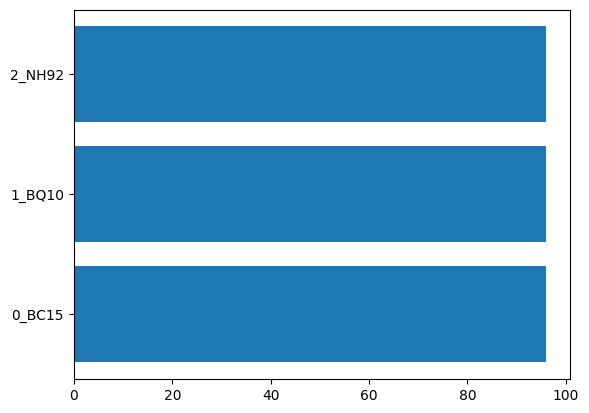

Total images: 288


In [40]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()
print('Total images: %d' %(sum(num_images)))


# Tạo tập train và test

In [41]:
from sklearn.model_selection import train_test_split

def split_data(data):
    #khai báo hai list rỗng
    X = []
    y = []
    data_folder = data
    i = 0
    for folder in os.listdir(data_folder):
        # Lặp các file trong từng thư mục con
        curr_path = os.path.join(data_folder, folder)
        for file in os.listdir(curr_path):
            curr_file = os.path.join(curr_path, file)
            image = cv.imread(curr_file)
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

            X.append(image)
            y.append(int(i))
        i = i+1
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
    return X_train, X_test, y_train, y_test
    



In [42]:
X_train, X_test, y_train, y_test = split_data(dataDir)


img for train: 230
label for train: 230
img for test: 58
label for test: 58


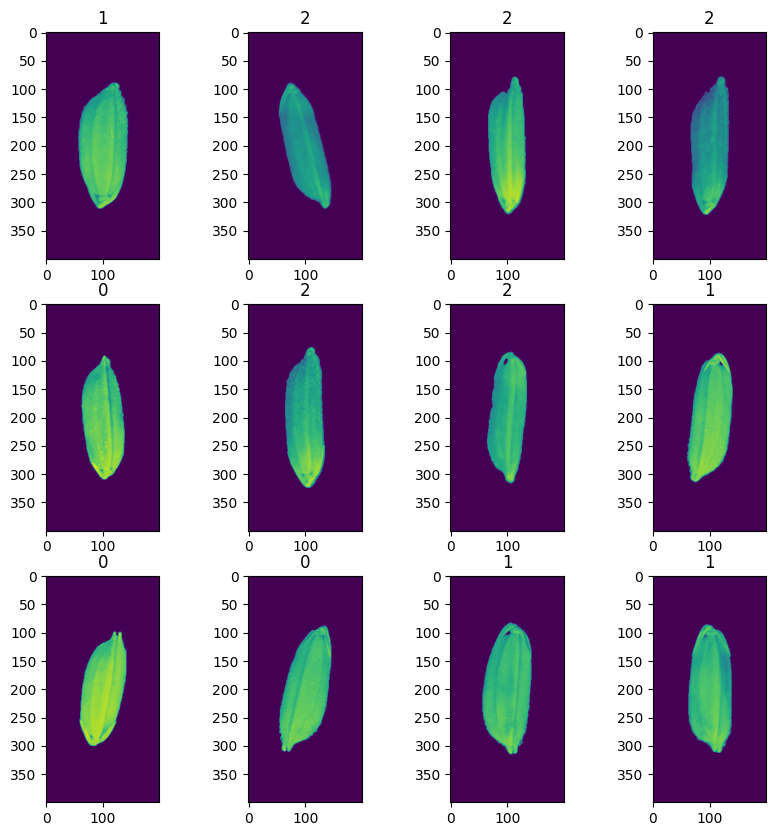

In [43]:
print("img for train: %d" % (len(X_train)))
print("label for train: %d" % (len(y_train)))

print("img for test: %d" % (len(X_test)))
print("label for test: %d" % (len(y_test)))

idxs=np.random.permutation(len(X_train))
plt.figure(figsize=(10,10))
for i in range(12):
    idx=idxs[i]
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx],norm=NoNorm())
    #plt.title(labels[label_train[idx]])
    plt.title(y_train[idx])
plt.show()

# Trich xuat dac trung

In [44]:
from skimage.feature import hog
# Định nghĩa hàm trích đặc trưng cho từng ảnh
def get_hog_features(img, orient=8, pix_per_cell=16, cell_per_block=4,vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),                                  
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image    
    else: # Otherwise call with one output     
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, visualize=vis, feature_vector=feature_vec)
                   #,multichannel=True)
        return features

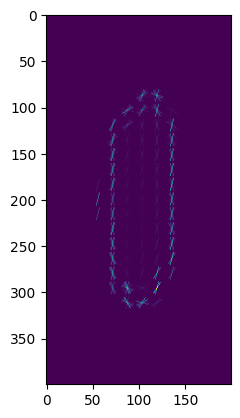

In [46]:
feature, img_hogg =get_hog_features(X_train[100], vis=True)
plt.imshow(img_hogg)

In [47]:
# trích xuất đặc trưng cho tập train và test
feat_train = []
for img in X_train:
    feat_HOG=get_hog_features(img)
    feat_train.append(feat_HOG)

feat_test = []
for img in X_test:
    feat_HOG=get_hog_features(img)
    feat_test.append(feat_HOG)

X_hog_tr=np.array(feat_train)
Y_tr=np.array(y_train)
X_hog_te=np.array(feat_test)
Y_te=np.array(y_test)

# Huấn luyện

In [48]:
# Huấn luyện SVM
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel="linear", C=1.0)
model_svm.fit(X_hog_tr,Y_tr)

SVC(kernel='linear')

In [49]:
# Kiểm thử mô hình SVM
y_predict = model_svm.predict(X_hog_te)
print ('Độ chính xác: ',model_svm.score(X_hog_te,Y_te))

Độ chính xác:  0.7758620689655172
